# 1. Importing necessary Libraries and the Dataset.

In [0]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 35kB/s 
     |████████████████████████████████| 491kB 58.8MB/s 
     |████████████████████████████████| 3.2MB 58.7MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [0]:
# This will prompt for authorization.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1 Importing necessary Libraries

In [0]:
# Import necessary Libraries

import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Using TensorFlow backend.


## 1.2 Reading the data from a shared location in drive

In [0]:
# Reading data from Train and Test files

import numpy as np
a=np.load("/content/drive/My Drive/DL Classification Task/classification data/Balanced_PCB/xtrain.npy")
b=np.load("/content/drive/My Drive/DL Classification Task/classification data/Balanced_PCB/ytrain.npy")
#b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)


## 1.3 High level overview of data

In [0]:
#project_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/Assignments_DonorsChoose_2018/train_data.csv')
#resource_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/Assignments_DonorsChoose_2018/resources.csv')

import numpy as np
a=np.load("/content/drive/My Drive/DL Classification Task/classification data/Balanced_PCB/xtrain.npy")
b=np.load("/content/drive/My Drive/DL Classification Task/classification data/Balanced_PCB/ytrain.npy")
#b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)


(298, 300, 300, 3)
(298,)


In [0]:
positive_class = 0
neg_class = 0
for i in b:
  if i==0:
    neg_class = neg_class+1
  else:
    positive_class = positive_class+1

print("Number of negative class data points are : ",neg_class)
print("NUmber of positive class data points are : ",positive_class)

Number of negative class data points are :  149
NUmber of positive class data points are :  149


0.0


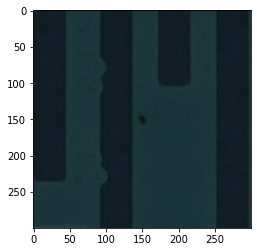

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(a[14], cmap='gray')
print(b[14])

# 2. Splitting the data into Train and Test and normalizing the pixel values


In [0]:
# train test split in scikit learn , test size = 30 percent

xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.20, random_state=42)

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

## 2.1 Data Normalization

In [0]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
53.070915
53.434452
3.7790053 3.7790053
-0.9931966 -0.9931966


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],300,300,3)
xtest =  xtest.reshape(xtest.shape[0],300,300,3)

## 2.2 One Hot encoding of class labels

In [0]:
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 1.]


# 3. CNN Model for classification of PCB Boards for Balanced Data

## 3.1 LeNet for Classification

### 3.1.1 LeNet Structure

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(6, (3,3), input_shape=(300,300,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 6)       168       
_________________________________________________________________
average_pooling2d_1 (Average (None, 149, 149, 6)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 145, 16)      2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 72, 72, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               9953400   
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

### 3.1.2 Compiling and Training Model

In [0]:
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, epochs=50, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 190 samples, validate on 48 samples
Epoch 1/50
190/190 [==============================] - 7s 35ms/step - loss: 0.7112 - accuracy: 0.5158 - val_loss: 0.5695 - val_accuracy: 0.8333
Epoch 2/50
190/190 [==============================] - 6s 33ms/step - loss: 0.5253 - accuracy: 0.7947 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 3/50
190/190 [==============================] - 6s 33ms/step - loss: 0.6312 - accuracy: 0.5737 - val_loss: 1.3017 - val_accuracy: 0.5000
Epoch 4/50
190/190 [==============================] - 6s 33ms/step - loss: 1.3533 - accuracy: 0.4789 - val_loss: 0.6193 - val_accuracy: 0.7292
Epoch 5/50
190/190 [==============================] - 6s 34ms/step - loss: 0.6097 - accuracy: 0.6895 - val_loss: 0.5812 - val_accuracy: 0.7708
Epoch 6/50
190/190 [==============================] - 6s 33ms/step - loss: 0.5611 - accuracy: 0.8105 - val_loss: 0.5495 - val_accuracy: 0.8333
Ep

### 3.1.3 Results on Test data.

In [0]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 1s 12ms/step


[0.5622508764266968, 0.75]

In [0]:
pred=model.predict(xtest[0].reshape(1,300,300,3))
print(pred)
print(pred.argmax())

[[0.703113 0.296887]]
0


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

60/60 [==============================] - 1s 12ms/step
0.5622508764266968
0.75


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

60/60 [==============================] - 1s 12ms/step
0.5622508764266968
0.75


In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

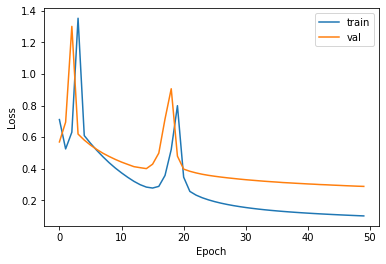

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

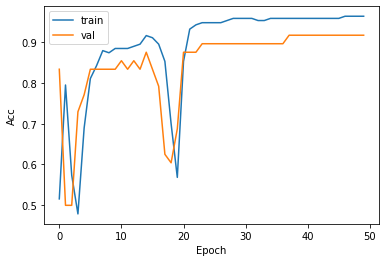

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 300, 300, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 1.] Predicted is 0
2 Actual is  [0. 1.] Predicted is 1
3 Actual is  [0. 1.] Predicted is 1
4 Actual is  [1. 0.] Predicted is 0
5 Actual is  [1. 0.] Predicted is 0
6 Actual is  [0. 1.] Predicted is 1
7 Actual is  [1. 0.] Predicted is 0
8 Actual is  [1. 0.] Predicted is 0
9 Actual is  [1. 0.] Predicted is 0
10 Actual is  [0. 1.] Predicted is 1


### 3.1.4 F1 score and Confusion Matrix

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.79      0.76      0.78        34
     class 1       0.70      0.73      0.72        26

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[26  8]
 [ 7 19]]


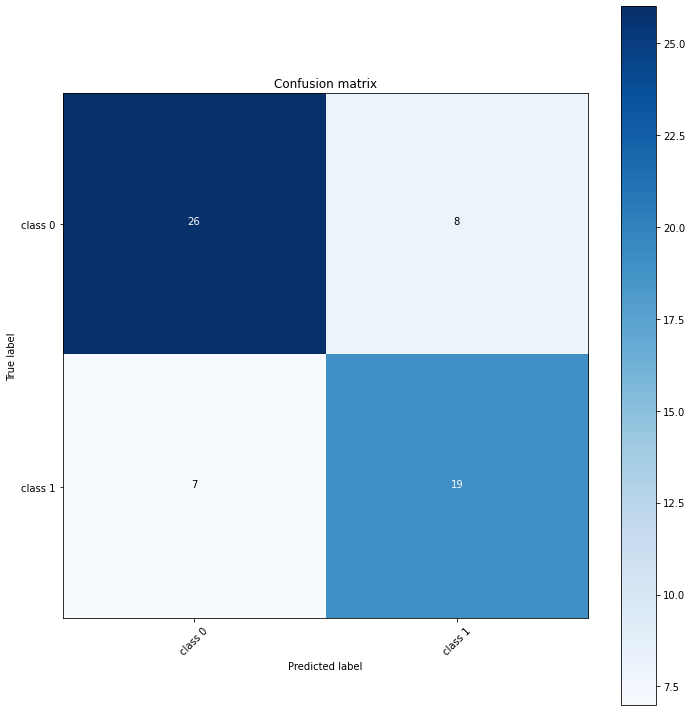

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## 3.2 Modified LeNet (3 Concolutional-Max Pooling Layers)

### 3.2.1 Modified Structure

In [0]:
# Slight Modification of LeNet (1998) model with one extra convolutional layer before flattening

model = models.Sequential()

model.add(layers.Conv2D(6, (3,3), input_shape=(300,300,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(16, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 6)       168       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 6)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 145, 145, 16)      2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 72, 72, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 68, 68, 16)        6416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)           

### 3.2.2 Compiling and training the Model

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, epochs=30, verbose=1)

Train on 190 samples, validate on 48 samples
Epoch 1/30
190/190 [==============================] - 7s 39ms/step - loss: 0.6955 - accuracy: 0.5632 - val_loss: 0.9320 - val_accuracy: 0.5208
Epoch 2/30
190/190 [==============================] - 7s 37ms/step - loss: 0.7620 - accuracy: 0.5368 - val_loss: 2.9987 - val_accuracy: 0.5000
Epoch 3/30
190/190 [==============================] - 7s 38ms/step - loss: 3.1044 - accuracy: 0.4789 - val_loss: 0.8083 - val_accuracy: 0.6250
Epoch 4/30
190/190 [==============================] - 7s 38ms/step - loss: 0.7454 - accuracy: 0.6105 - val_loss: 0.8492 - val_accuracy: 0.5000
Epoch 5/30
190/190 [==============================] - 7s 37ms/step - loss: 0.7870 - accuracy: 0.5211 - val_loss: 0.8173 - val_accuracy: 0.5000
Epoch 6/30
190/190 [==============================] - 7s 37ms/step - loss: 0.7375 - accuracy: 0.5211 - val_loss: 0.6347 - val_accuracy: 0.5000
Epoch 7/30
190/190 [==============================] - 7s 38ms/step - loss: 0.5537 - accuracy: 0.5

### 3.2.3 Results on Test Data

In [0]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 1s 13ms/step


[0.85101717710495, 0.7333333492279053]

In [0]:
pred=model.predict(xtest[0].reshape(1,300,300,3))
print(pred)
print(pred.argmax())

[[0.93 0.07]]
0


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

60/60 [==============================] - 1s 13ms/step
0.85101717710495
0.7333333492279053


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

60/60 [==============================] - 1s 12ms/step
0.85101717710495
0.7333333492279053


In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

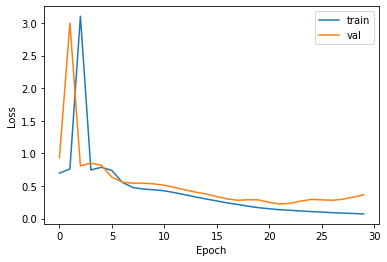

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

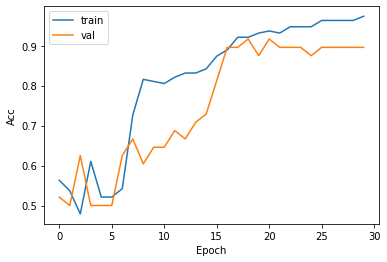

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 300, 300, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 1.] Predicted is 0
2 Actual is  [0. 1.] Predicted is 1
3 Actual is  [0. 1.] Predicted is 1
4 Actual is  [1. 0.] Predicted is 0
5 Actual is  [1. 0.] Predicted is 0
6 Actual is  [0. 1.] Predicted is 1
7 Actual is  [1. 0.] Predicted is 0
8 Actual is  [1. 0.] Predicted is 0
9 Actual is  [1. 0.] Predicted is 0
10 Actual is  [0. 1.] Predicted is 1


### 3.2.4 F1 Score and Confusion Matrix

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.80      0.71      0.75        34
     class 1       0.67      0.77      0.71        26

    accuracy                           0.73        60
   macro avg       0.73      0.74      0.73        60
weighted avg       0.74      0.73      0.73        60



Confusion matrix, without normalization
[[24 10]
 [ 6 20]]


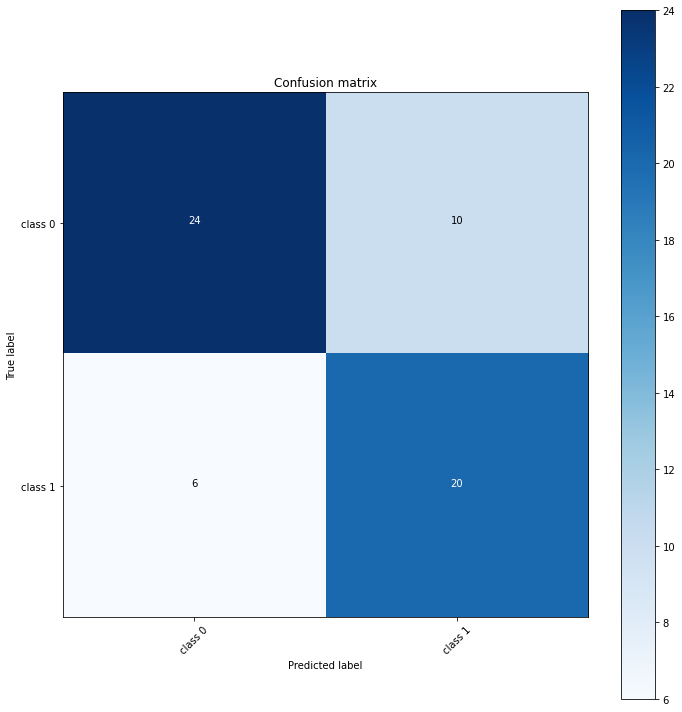

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## 3.3 4-Convolutional Layers with Max-Pooling(5X5) and 2 Dense Layers And Dropout to avoid overfitting

### 3.3.1 Model Structure

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), input_shape=(300,300,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(layers.Conv2D(32, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(layers.Conv2D(32, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(layers.Conv2D(32, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))


model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 144, 144, 32)      12832     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 71, 71, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 67, 67, 32)        25632     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 32)       

### 3.3.2 Compiling and training the Model

In [0]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, epochs=50, verbose=1)

Train on 190 samples, validate on 48 samples
Epoch 1/50
190/190 [==============================] - 14s 76ms/step - loss: 0.8023 - accuracy: 0.5158 - val_loss: 1.0274 - val_accuracy: 0.5000
Epoch 2/50
190/190 [==============================] - 14s 74ms/step - loss: 1.0710 - accuracy: 0.5211 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 3/50
190/190 [==============================] - 14s 74ms/step - loss: 0.6912 - accuracy: 0.5316 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 4/50
190/190 [==============================] - 14s 74ms/step - loss: 0.7008 - accuracy: 0.4947 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 5/50
190/190 [==============================] - 14s 74ms/step - loss: 0.6936 - accuracy: 0.5316 - val_loss: 0.6910 - val_accuracy: 0.5208
Epoch 6/50
190/190 [==============================] - 14s 74ms/step - loss: 0.6827 - accuracy: 0.5737 - val_loss: 0.6865 - val_accuracy: 0.7292
Epoch 7/50
190/190 [==============================] - 14s 73ms/step - loss: 0.6859 - accura

### 3.3.3 Results on Test Data

In [0]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 1s 18ms/step


[1.3973800659179687, 0.7666666507720947]

In [0]:
pred=model.predict(xtest[0].reshape(1,300,300,3))
print(pred)
print(pred.argmax())

[[0.02 0.98]]
1


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

60/60 [==============================] - 1s 19ms/step
1.3973800659179687
0.7666666507720947


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

60/60 [==============================] - 1s 19ms/step
1.3973800659179687
0.7666666507720947


In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

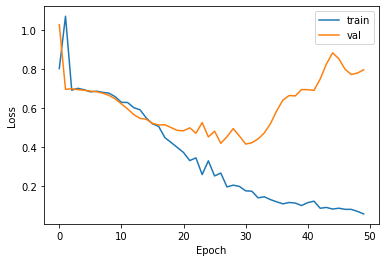

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

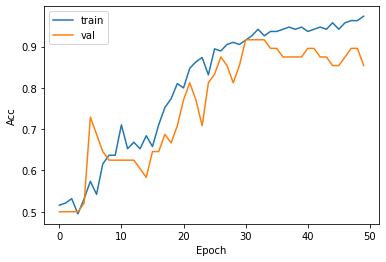

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 300, 300, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 1.] Predicted is 1
2 Actual is  [0. 1.] Predicted is 1
3 Actual is  [0. 1.] Predicted is 1
4 Actual is  [1. 0.] Predicted is 0
5 Actual is  [1. 0.] Predicted is 0
6 Actual is  [0. 1.] Predicted is 1
7 Actual is  [1. 0.] Predicted is 1
8 Actual is  [1. 0.] Predicted is 0
9 Actual is  [1. 0.] Predicted is 0
10 Actual is  [0. 1.] Predicted is 1


### 3.3.4 F1 Score and Confusion Matrix

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.74      0.78        34
     class 1       0.70      0.81      0.75        26

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.78      0.77      0.77        60



Confusion matrix, without normalization
[[25  9]
 [ 5 21]]


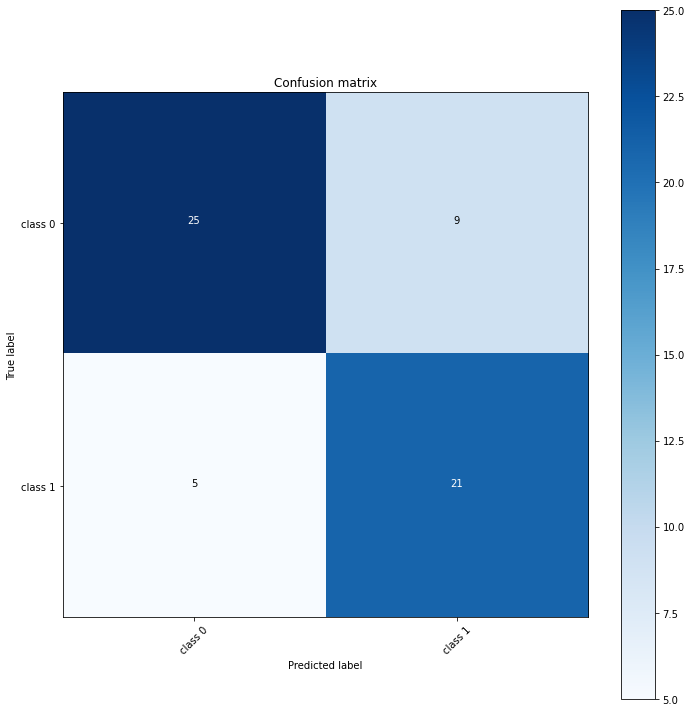

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## 3.4 Model - 3 with Data Augumentation

### 3.4.1 Model Structure

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3,3), input_shape=(300,300,3), activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(layers.Conv2D(32, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(layers.Conv2D(32, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(layers.Conv2D(32, (5,5),activation='relu', strides=(1,1), padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))


model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.40))
model.add(layers.Dense(2, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 71, 71, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 67, 67, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)      

### 3.4.2 Compiling and training


In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
it_train = datagen.flow(xtrain, ytrain, batch_size=32)
# fit model
steps = int(xtrain.shape[0] / 32)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(xtest, ytest), verbose=1)
# evaluate model  

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
7/7 [==============================] - 18s 3s/step - loss: 0.7786 - accuracy: 0.4903 - val_loss: 0.7005 - val_accuracy: 0.4333
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: 0.6925 - accuracy: 0.4951 - val_loss: 0.6819 - val_accuracy: 0.6500
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 0.6876 - accuracy: 0.5000 - val_loss: 0.6683 - val_accuracy: 0.4000
Epoch 4/20
7/7 [==============================] - 18s 3s/step - loss: 0.6335 - accuracy: 0.5938 - val_loss: 0.6189 - val_accuracy: 0.6833
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.5896 - accuracy: 0.6262 - val_loss: 0.6651 - val_accuracy: 0.6833
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: 0.6433 - accuracy: 0.5777 - val_loss: 0.6307 - val_accuracy: 0.6833
Epoch 7/20
7/7 [==============================] - 17s 2s/step - loss: 0.6242 

### 3.4.3 Results on Test data

In [0]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 1s 19ms/step


[0.6249313215414684, 0.699999988079071]

In [0]:
pred=model.predict(xtest[0].reshape(1,300,300,3))
print(pred)
print(pred.argmax())

[[0.67 0.33]]
0


In [0]:

test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

60/60 [==============================] - 1s 19ms/step
0.6249313215414684
0.699999988079071


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

60/60 [==============================] - 1s 19ms/step
0.6249313215414684
0.699999988079071


In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

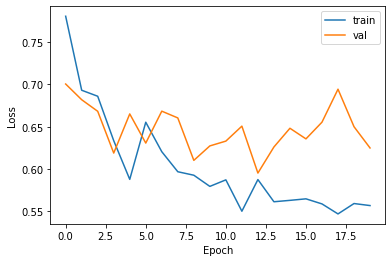

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

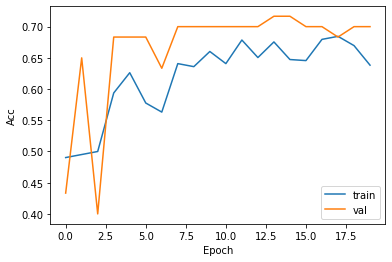

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 300, 300, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 1.] Predicted is 0
2 Actual is  [0. 1.] Predicted is 0
3 Actual is  [0. 1.] Predicted is 0
4 Actual is  [1. 0.] Predicted is 0
5 Actual is  [1. 0.] Predicted is 0
6 Actual is  [0. 1.] Predicted is 0
7 Actual is  [1. 0.] Predicted is 0
8 Actual is  [1. 0.] Predicted is 0
9 Actual is  [1. 0.] Predicted is 0
10 Actual is  [0. 1.] Predicted is 1


### 3.4.5 F1 Score And Confusion Matrix

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.66      0.97      0.79        34
     class 1       0.90      0.35      0.50        26

    accuracy                           0.70        60
   macro avg       0.78      0.66      0.64        60
weighted avg       0.76      0.70      0.66        60



Confusion matrix, without normalization
[[33  1]
 [17  9]]


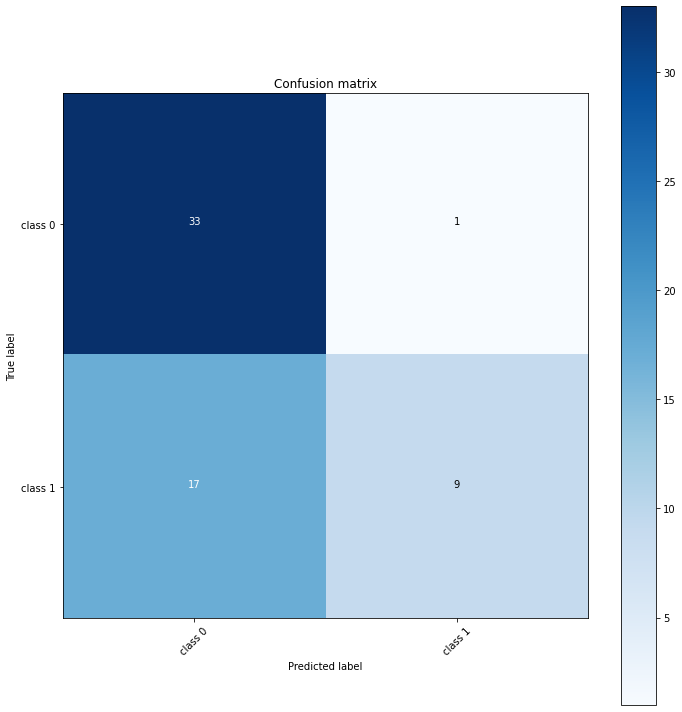

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## 3.5 Transfer Learning with VGG-16

In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [300, 300]

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights


In [0]:
vgg.trainable = False

### 3.5.1 Setting VGG-16 Model Training as False

In [0]:
import pandas as pd

set_trainable = False
for layer in vgg.layers:
    if layer.name in []:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


### 3.5.2 Model Structure

In [0]:

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
'''
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
it_train = datagen.flow(xtrain, ytrain, batch_size=32)
# fit model
steps = int(xtrain.shape[0] / 32)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(xtest, ytest), verbose=1)
# evaluate model  '''

"\nmodel.compile(loss='categorical_crossentropy',\n              optimizer='Adam',\n              metrics=['accuracy'])\n\ndatagen = ImageDataGenerator(zoom_range=0.3, rotation_range=50,\n                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, \n                                   horizontal_flip=True, fill_mode='nearest')\nit_train = datagen.flow(xtrain, ytrain, batch_size=32)\n# fit model\nsteps = int(xtrain.shape[0] / 32)\nhistory = model.fit_generator(it_train, steps_per_epoch=steps, epochs=20, validation_data=(xtest, ytest), verbose=1)\n# evaluate model  "

### 3.5.3 Model compiling and Training

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, epochs=50, verbose=1)

Train on 190 samples, validate on 48 samples
Epoch 1/50
190/190 [==============================] - 102s 538ms/step - loss: 1.2941 - accuracy: 0.4368 - val_loss: 8.7704 - val_accuracy: 0.5000
Epoch 2/50
190/190 [==============================] - 101s 532ms/step - loss: 8.2051 - accuracy: 0.5158 - val_loss: 0.8559 - val_accuracy: 0.5833
Epoch 3/50
190/190 [==============================] - 102s 535ms/step - loss: 1.9867 - accuracy: 0.5053 - val_loss: 2.4412 - val_accuracy: 0.5000
Epoch 4/50
190/190 [==============================] - 101s 533ms/step - loss: 3.5097 - accuracy: 0.5105 - val_loss: 0.8312 - val_accuracy: 0.6042
Epoch 5/50
190/190 [==============================] - 101s 531ms/step - loss: 2.7947 - accuracy: 0.5158 - val_loss: 1.1663 - val_accuracy: 0.5000
Epoch 6/50
190/190 [==============================] - 101s 530ms/step - loss: 1.7722 - accuracy: 0.6526 - val_loss: 1.9788 - val_accuracy: 0.5000
Epoch 7/50
190/190 [==============================] - 101s 531ms/step - loss: 2

### 3.5.4 Results on Test Data

In [0]:
_, acc = model.evaluate(xtest, ytest, verbose=0)
print('> %.3f' % (acc * 100.0))



> 81.667


In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

60/60 [==============================] - 26s 431ms/step
0.6772413770357768
0.8166666626930237


In [0]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

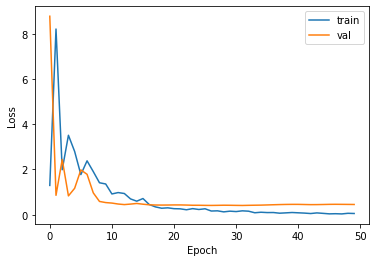

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

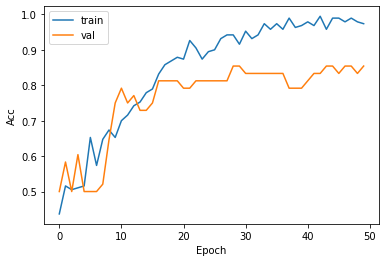

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 300, 300, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

1 Actual is  [0. 1.] Predicted is 1
2 Actual is  [0. 1.] Predicted is 1
3 Actual is  [0. 1.] Predicted is 1
4 Actual is  [1. 0.] Predicted is 0
5 Actual is  [1. 0.] Predicted is 0
6 Actual is  [0. 1.] Predicted is 0
7 Actual is  [1. 0.] Predicted is 1
8 Actual is  [1. 0.] Predicted is 0
9 Actual is  [1. 0.] Predicted is 0
10 Actual is  [0. 1.] Predicted is 1


### 3.5.5 F1 Score and Confusion Matrix

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.87      0.79      0.83        34
     class 1       0.76      0.85      0.80        26

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



Confusion matrix, without normalization
[[27  7]
 [ 4 22]]


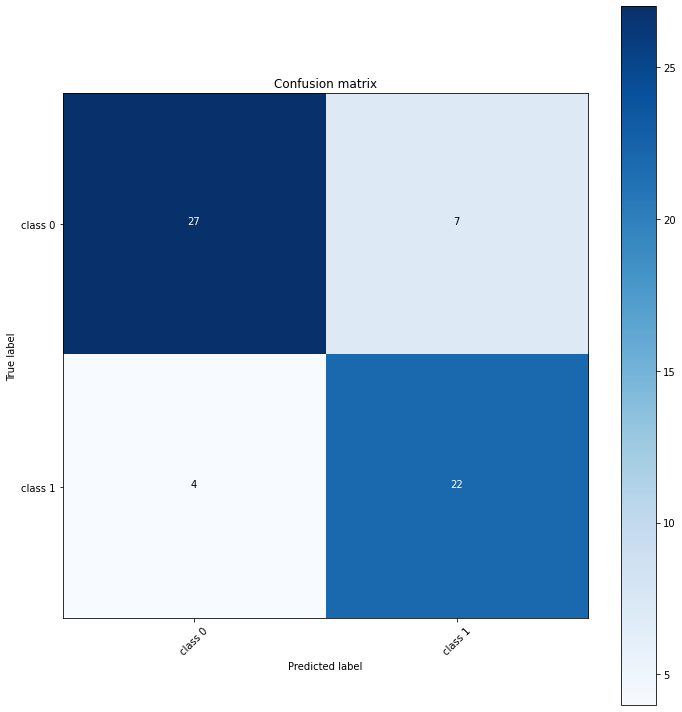

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

# 4. Summary

In [2]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Optimizer","Dropout","train loss","Val loss","Val Accuracy","test accuracy","F1 score(class 0)","F1 score(class 1)"]
x.add_row(["LeNet","SGD","No","0.10","0.287","0.963","0.75","0.78","0.72"])
x.add_row(["Modified LeNet","ADAM","No","0.07","0.363","0.895","0.733","0.75","0.71"])
x.add_row(["4 ConV + MaxPool Model","ADAM","Yes","0.05","0.796","0.85","0.76","0.78","0.75"])
x.add_row(["4 ConV + MaxPool Model + Image Augumentation","ADAM","Yes","0.52","0.65","0.70","0.69","0.79","0.50"])
x.add_row(["VGG-16 + Dense Layers","ADAM","Yes","0.0528","0.45","0.8542","0.8166","0.83","0.80"])

print(x)

+----------------------------------------------+-----------+---------+------------+----------+--------------+---------------+-------------------+-------------------+
|                    Model                     | Optimizer | Dropout | train loss | Val loss | Val Accuracy | test accuracy | F1 score(class 0) | F1 score(class 1) |
+----------------------------------------------+-----------+---------+------------+----------+--------------+---------------+-------------------+-------------------+
|                    LeNet                     |    SGD    |    No   |    0.10    |  0.287   |    0.963     |      0.75     |        0.78       |        0.72       |
|                Modified LeNet                |    ADAM   |    No   |    0.07    |  0.363   |    0.895     |     0.733     |        0.75       |        0.71       |
|            4 ConV + MaxPool Model            |    ADAM   |   Yes   |    0.05    |  0.796   |     0.85     |      0.76     |        0.78       |        0.75       |
| 4 